In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Load the dataset
# If you have Excel 
df = pd.read_csv("C:/Users/kotte/Downloads/Generative_AI_Industry_Adoption.csv")

In [107]:
# Basic Exploration
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (100, 6)
   Year Country    Industry  Adoption Rate (%)  \
0  2023     USA   Education                 41   
1  2023   China     Finance                 85   
2  2023     USA     Finance                 37   
3  2023      UK       Legal                 38   
4  2024     USA  Technology                 65   

                                       Main Use Case      Source  
0  AI-driven tutoring and course material generation  Salesforce  
1   Automated financial advising and fraud detection     Reuters  
2   Automated financial advising and fraud detection  Salesforce  
3               Contract analysis and legal research     Reuters  
4      Software development and AI tool optimization    Deloitte  


In [108]:
# Cleaning and preparing
#Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Year                 0
Country              0
Industry             0
Adoption Rate (%)    0
Main Use Case        0
Source               0
dtype: int64


In [109]:
# Standardize text fields if needed
df['Industry'] = df['Industry'].str.title()
df['Country'] = df['Country'].str.title()

In [110]:
# 2. Advanced Descriptive Statistics 
# Overall adoption statistics
overall_mean = df['Adoption Rate (%)'].mean()
overall_median = df['Adoption Rate (%)'].median()
overall_std = df['Adoption Rate (%)'].std()



In [111]:
print(f"\nOverall Mean Adoption Rate: {overall_mean:.2f}%")
print(f"Overall Median Adoption Rate: {overall_median:.2f}%")
print(f"Stardard Deviation: {overall_std:.2f}%")


Overall Mean Adoption Rate: 51.46%
Overall Median Adoption Rate: 53.00%
Stardard Deviation: 22.22%


In [112]:
#3. Industry & Year Analysis
industry_year = df.groupby(['Year', 'Industry'])['Adoption Rate (%)'].mean().unstack()
print("/nIndustry-wise Adoption Rate by year:\n", industry_year)


/nIndustry-wise Adoption Rate by year:
 Industry  Education    Finance  Healthcare      Legal  Manufacturing  \
Year                                                                   
2023          57.40  60.000000   39.833333  62.285714      45.333333   
2024          32.75  47.428571   39.400000  63.333333      68.500000   

Industry  Marketing  Retail  Technology  
Year                                     
2023      63.000000    53.8        45.0  
2024      52.071429    53.0        57.0  


In [113]:
# Adoption Rate Growth calculation
industry_growth = industry_year.pct_change().dropna() * 100
print("\nIdustry Growth Rate from 2023 to 2024:\n", industry_growth)


Idustry Growth Rate from 2023 to 2024:
 Industry  Education    Finance  Healthcare     Legal  Manufacturing  \
Year                                                                  
2024     -42.944251 -20.952381   -1.087866  1.681957      51.102941   

Industry  Marketing    Retail  Technology  
Year                                       
2024     -17.346939 -1.486989   26.666667  


In [114]:
# 4. Country-Industry Pivot Table
country_industry_pivot = pd.pivot_table(df, index='Country', columns='Industry', values='Adoption Rate (%)', aggfunc=np.mean)
print("\nCountry vs Industry Pivot Table:\n", country_industry_pivot)



Country vs Industry Pivot Table:
 Industry   Education    Finance  Healthcare  Legal  Manufacturing  Marketing  \
Country                                                                        
Australia        NaN  51.500000   32.000000   44.0      12.000000  73.000000   
China           74.0  83.000000   54.000000   69.5      41.000000  54.333333   
Germany         36.0  42.500000   34.333333   54.5            NaN  41.000000   
Global          17.0  16.000000   49.000000   81.0      55.000000  50.000000   
India           45.0  86.000000   15.000000   72.0      72.666667  49.666667   
Japan           68.0  72.333333   44.333333   71.5      61.000000  55.666667   
Uk               NaN  16.000000   34.000000   38.0      63.000000        NaN   
Usa             32.5  50.000000   35.500000    NaN            NaN  71.500000   

Industry   Retail  Technology  
Country                        
Australia    45.5         NaN  
China        81.0        79.0  
Germany       NaN        66.0  
Glob

C:\Users\kotte\AppData\Local\Temp\ipykernel_7500\757531097.py:2: FutureWarning: The provided callable <function mean at 0x000001A539DE07C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  country_industry_pivot = pd.pivot_table(df, index='Country', columns='Industry', values='Adoption Rate (%)', aggfunc=np.mean)


In [115]:
# C0-rrelation Analysis
df_encoded = df.copy()
df_encoded['Year'] = df_encoded['Year'].astype(int)
df_encoded['Country_Code'] = df_encoded['Country'].astype('category').cat.codes
df_encoded['Industry_Code'] = df_encoded['Industry'].astype('category').cat.codes


In [116]:
# Correlation Matrix
correlation = df_encoded[['Year', 'Country_Code', 'Industry_Code', 'Adoption Rate (%)']].corr()

In [117]:
print("\nCorrelation Matrix\n", correlation)


Correlation Matrix
                        Year  Country_Code  Industry_Code  Adoption Rate (%)
Year               1.000000      0.015894       0.108954          -0.022088
Country_Code       0.015894      1.000000      -0.051695           0.011407
Industry_Code      0.108954     -0.051695       1.000000           0.057110
Adoption Rate (%) -0.022088      0.011407       0.057110           1.000000


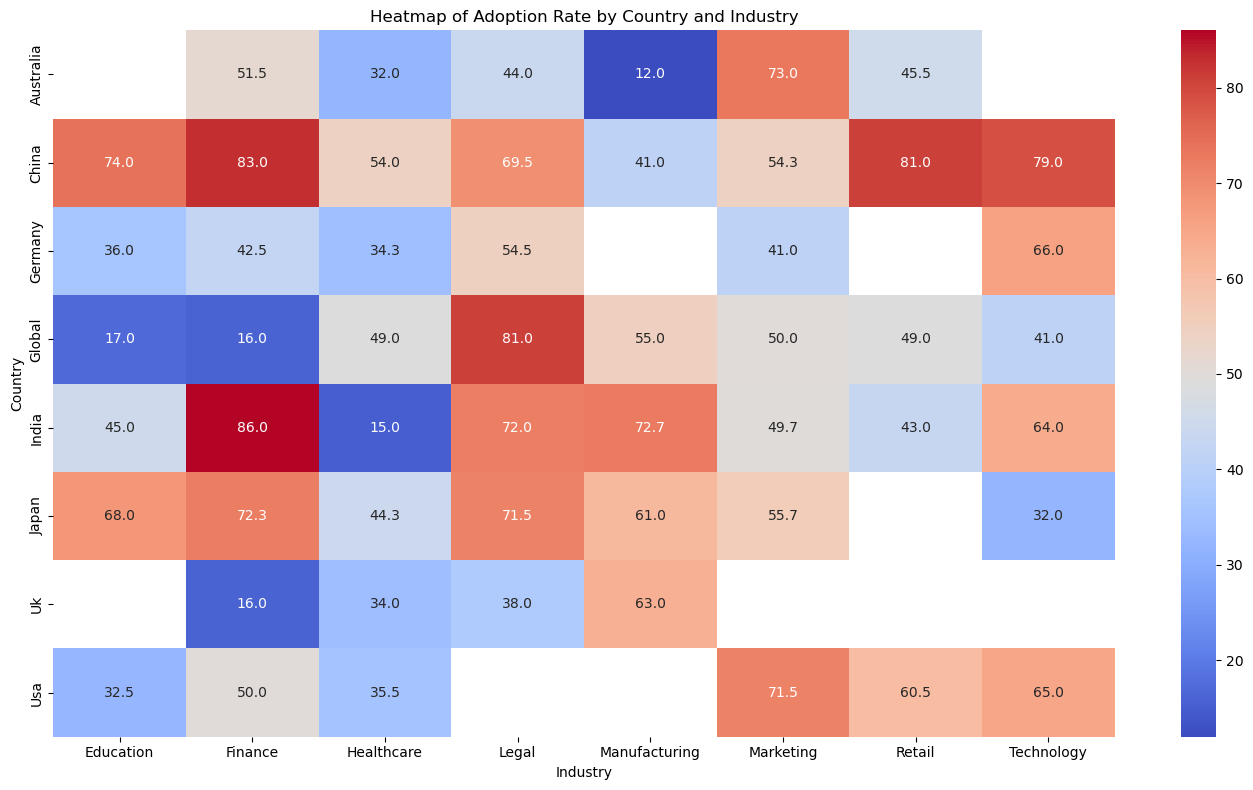

In [118]:
# Visualization

#6.1 Heatmap: Country vs Industry Adoption ---
plt.figure(figsize=(14, 8))
sns.heatmap(country_industry_pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap of Adoption Rate by Country and Industry")
plt.xlabel("Industry")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


[Text(0, 0, 'Education'),
 Text(1, 0, 'Finance'),
 Text(2, 0, 'Healthcare'),
 Text(3, 0, 'Legal'),
 Text(4, 0, 'Manufacturing'),
 Text(5, 0, 'Marketing'),
 Text(6, 0, 'Retail'),
 Text(7, 0, 'Technology')]

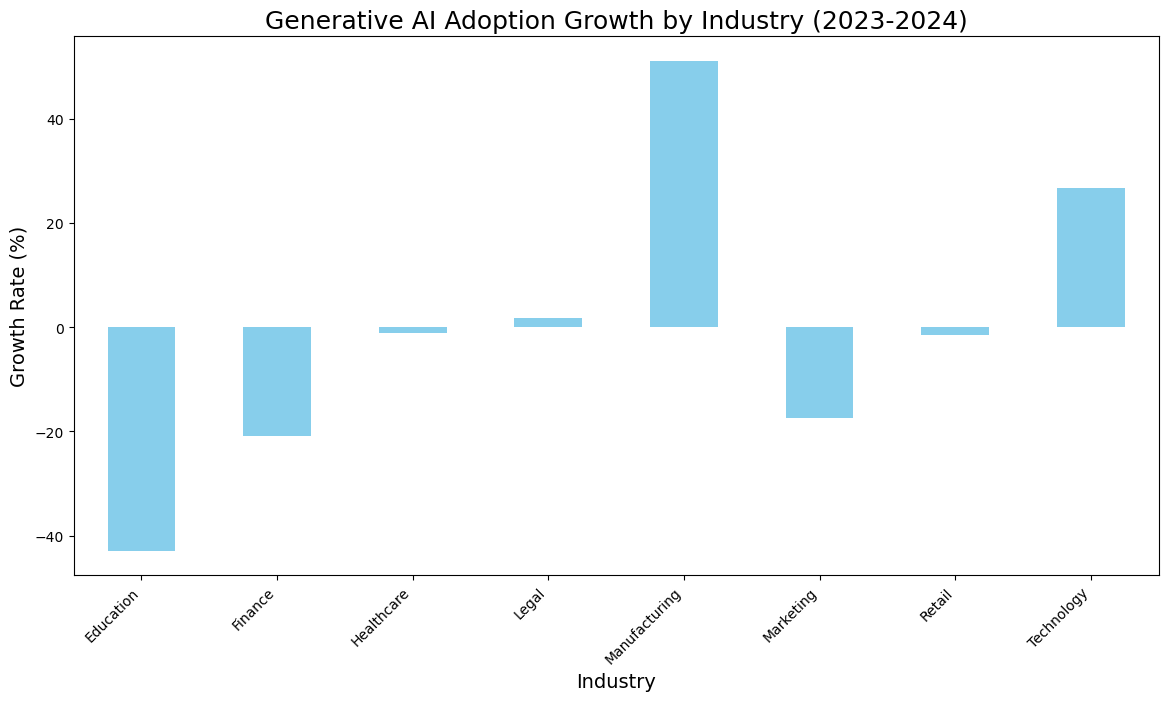

In [119]:
# --- 6.2 Barplot: Growth by Industry ---
fig, ax = plt.subplots(figsize=(14, 7))
bars = industry_growth.T.plot(kind='bar', color='skyblue', ax=ax, legend=False)
ax.set_title('Generative AI Adoption Growth by Industry (2023-2024)', fontsize=18)
ax.set_ylabel('Growth Rate (%)', fontsize=14)
ax.set_xlabel('Industry', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

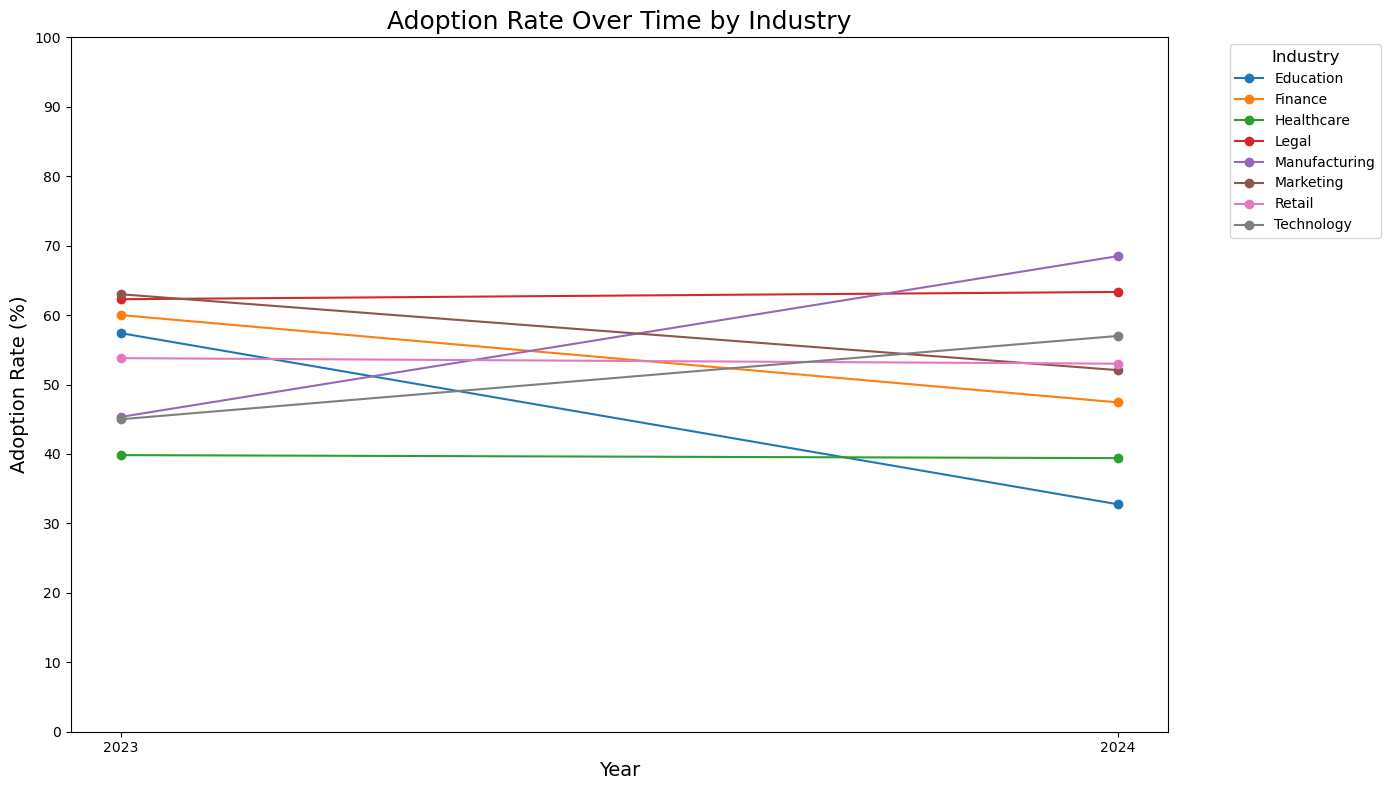

In [120]:
# --- 6.3 Lineplot: Adoption Rate Over Years per Industry ---
plt.figure(figsize=(14, 8))
for industry in industry_year.columns:
    plt.plot(industry_year.index, industry_year[industry], marker='o', label=industry)

plt.title('Adoption Rate Over Time by Industry', fontsize=18)
plt.ylabel('Adoption Rate (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(industry_year.index)
plt.yticks(range(0, 101, 10))

# Remove unnecessary gridlines
plt.grid(visible=False)

# Smart legend placement
plt.legend(title="Industry", fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

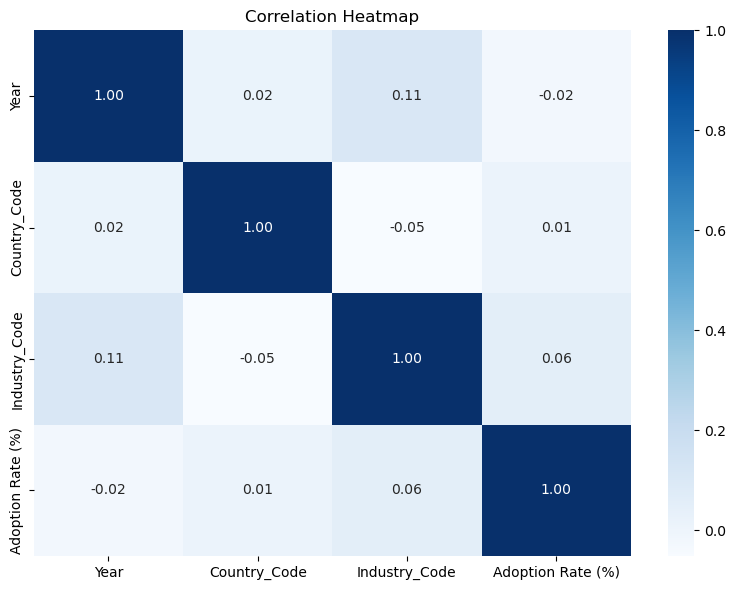

In [121]:
# 6.4 Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

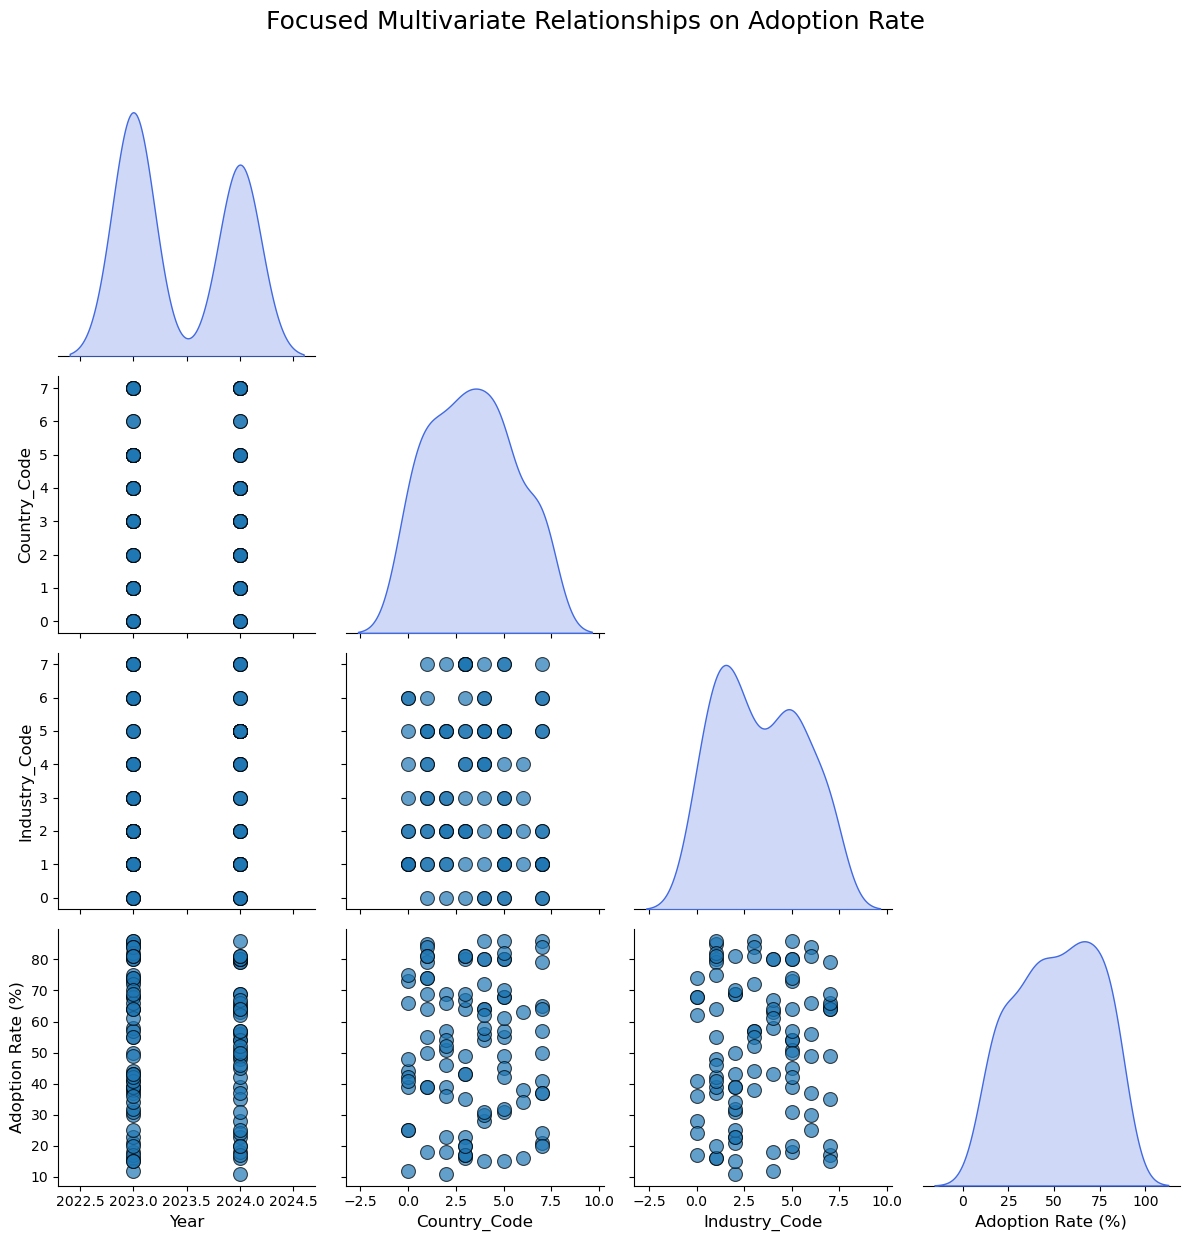

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important columns
selected_columns = ['Year', 'Country_Code', 'Industry_Code', 'Adoption Rate (%)']

# Updated clean pairplot
g = sns.pairplot(
    df_encoded[selected_columns],
    kind='scatter',
    diag_kind='kde',
    plot_kws={'alpha': 0.7, 's': 100, 'edgecolor': 'k'},  # bigger clearer points
    diag_kws={'fill': True, 'color': 'royalblue'},  # updated from shade=True to fill=True
    corner=True
)

# Set titles for each axis manually
for ax in g.axes.flat:
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)

# Set overall title and adjust
g.fig.suptitle('Focused Multivariate Relationships on Adoption Rate', y=1.03, fontsize=18)

# Adjust layout
g.fig.set_size_inches(12, 12)  # make graph even bigger and more proportional
plt.tight_layout()
plt.show()



In [123]:
#Deep Statistical Profiling

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 1. Calculate Skewness and Kurtosis
adoption_rate = df['Adoption Rate (%)']

skewness = skew(adoption_rate)
kurt = kurtosis(adoption_rate)

print(f"Skewness of Adoption Rate: {skewness:.3f}")
print(f"Kurtosis of Adoption Rate: {kurt:.3f}")



Skewness of Adoption Rate: -0.135
Kurtosis of Adoption Rate: -1.176


In [124]:
# 2. Interpret Skewness
if skewness> 0.5:
    print("Distribution is Right Skewed (Positively skewed).")
elif skewness < -0.5:
    print("Distribution is left Skewed (negatively skewed).")
else:
    print("Distribution is approximately Symmetrical.")

Distribution is approximately Symmetrical.


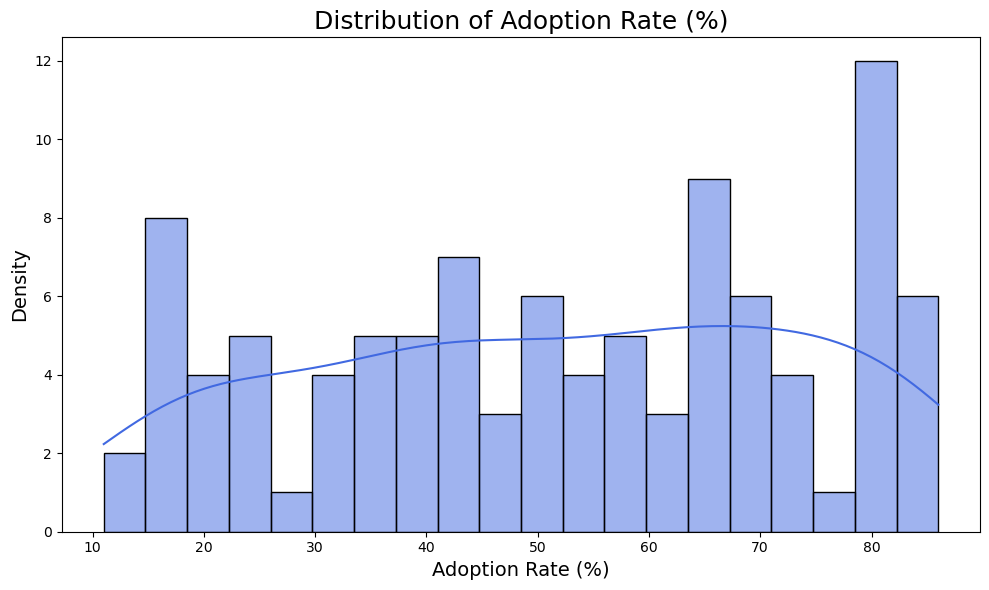

In [125]:
# 3. Plot Histogram with KDE (Smooth Line)
plt.figure(figsize=(10,6))
sns.histplot(adoption_rate, kde=True, color='royalblue', bins=20, edgecolor='black')
plt.title('Distribution of Adoption Rate (%)', fontsize=18)
plt.xlabel('Adoption Rate (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(visible=False)
plt.tight_layout()
plt.show()

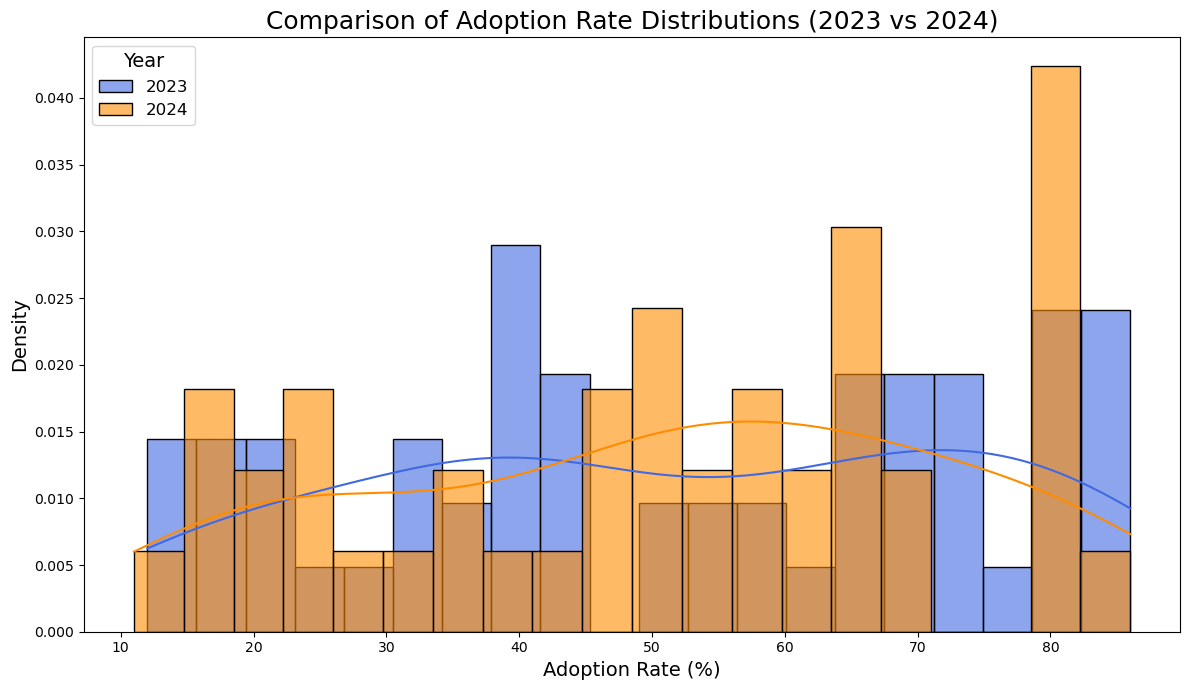

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter adoption rates by year
adoption_2023 = df[df['Year'] == 2023]['Adoption Rate (%)']
adoption_2024 = df[df['Year'] == 2024]['Adoption Rate (%)']

# Plot
plt.figure(figsize=(12, 7))

# 2023 distribution
sns.histplot(adoption_2023, kde=True, color='royalblue', label='2023', stat='density', bins=20, alpha=0.6, edgecolor='black')

# 2024 distribution
sns.histplot(adoption_2024, kde=True, color='darkorange', label='2024', stat='density', bins=20, alpha=0.6, edgecolor='black')

# Titles and Labels
plt.title('Comparison of Adoption Rate Distributions (2023 vs 2024)', fontsize=18)
plt.xlabel('Adoption Rate (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Legend
plt.legend(title='Year', fontsize=12, title_fontsize=14)

# Clean grid
plt.grid(visible=False)

# Tight layout
plt.tight_layout()
plt.show()


In [127]:
#2. Time Series Task - Compare + Forecast for 2025
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [128]:
yearly_avg = df.groupby('Year')['Adoption Rate (%)'].mean().reset_index()


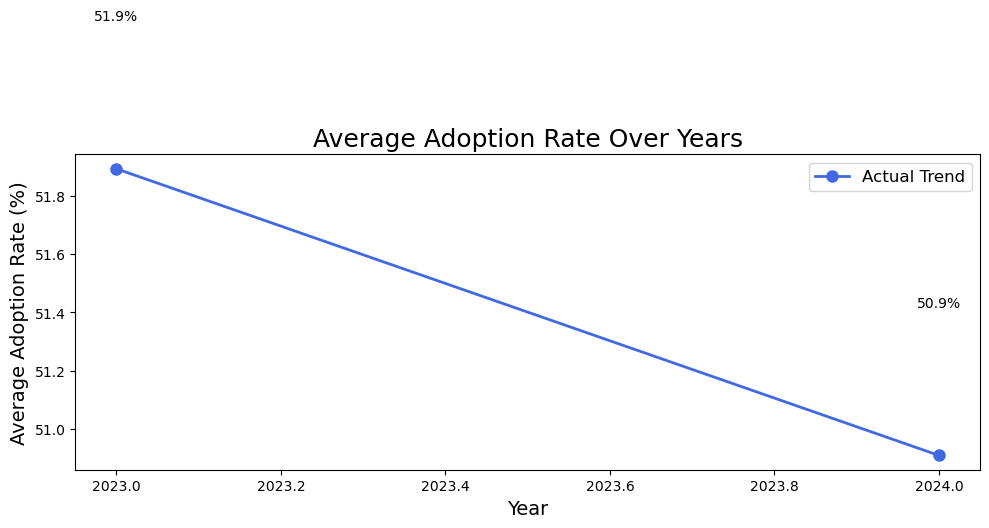

In [129]:
# Optimized clean trend line plot (No Gridlines, Clean Labels)

plt.figure(figsize=(10,6))
plt.plot(
    yearly_avg['Year'], 
    yearly_avg['Adoption Rate (%)'], 
    marker='o', 
    markersize=8, 
    linewidth=2, 
    color='royalblue', 
    label='Actual Trend'
)

# Titles and Labels
plt.title('Average Adoption Rate Over Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Adoption Rate (%)', fontsize=14)

# Remove gridlines
plt.grid(visible=False)

# Optional: Annotate data points
for x, y in zip(yearly_avg['Year'], yearly_avg['Adoption Rate (%)']):
    plt.text(x, y + 0.5, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

# Legend (smaller, not overshadowing)
plt.legend(fontsize=12)

# Tight layout
plt.tight_layout()
plt.show()



In [130]:
# Forecast for 2025 using Linear Regression
X = yearly_avg['Year'].values.reshape(-1,1)
y = yearly_avg['Adoption Rate (%)'].values

In [131]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [132]:
# Predict for 2025
forecast_2025 = model.predict([[2025]])
print(f"Forecasted Average Adoption Rate for 2025: {forecast_2025[0]:.2f}%")


Forecasted Average Adoption Rate for 2025: 49.93%


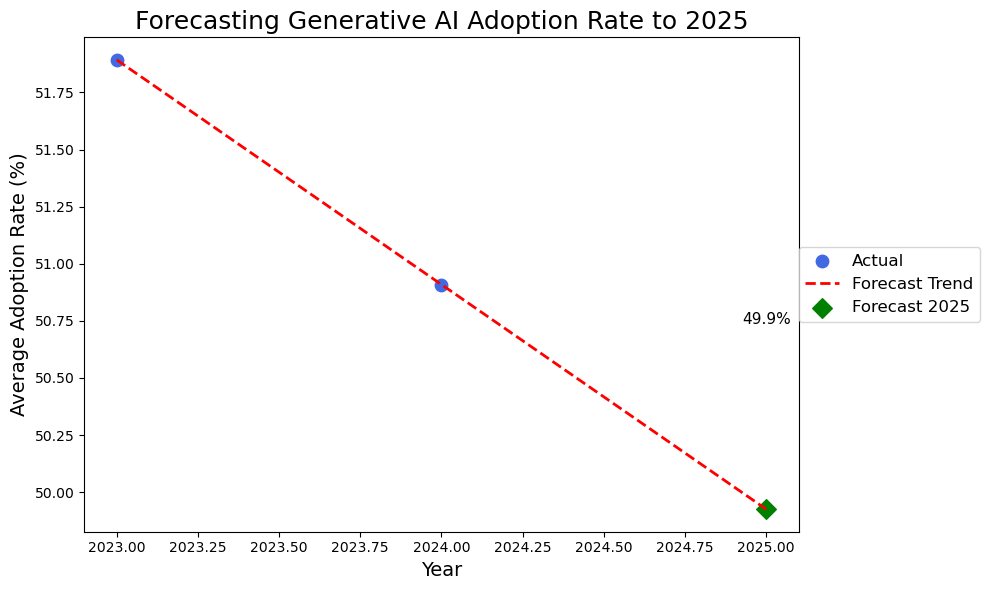

In [139]:
# Optimized Forecast Plot with Legend on the Right

plt.figure(figsize=(10,6))

# Actual points
plt.scatter(X, y, color='royalblue', label='Actual', s=80)

# Forecast trend line (dashed)
plt.plot(
    np.append(X, [[2025]]), 
    model.predict(np.append(X, [[2025]]).reshape(-1,1)), 
    color='red', 
    linestyle='--', 
    linewidth=2,
    label='Forecast Trend'
)

# Forecast 2025 point
plt.scatter(2025, forecast_2025, color='green', label='Forecast 2025', s=100, marker='D')

# Titles and Labels
plt.title('Forecasting Generative AI Adoption Rate to 2025', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Adoption Rate (%)', fontsize=14)

# Remove gridlines
plt.grid(visible=False)

# Annotate the forecasted point
plt.text(2025, forecast_2025 + 0.8, f'{forecast_2025[0]:.1f}%', ha='center', va='bottom', fontsize=11)

# Move legend to the right side OUTSIDE
plt.legend(
    fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1, 0.5),  # x=1 (right side), y=0.5 (centered vertically)
    borderaxespad=0
)

# Tight layout
plt.tight_layout()
plt.show()


In [134]:
# Advanced Multivariate Analysis- Industry Growth Bar Plot


Lower Bound: -16.62
Upper Bound: 120.38
Number of Outliers Detected: 0


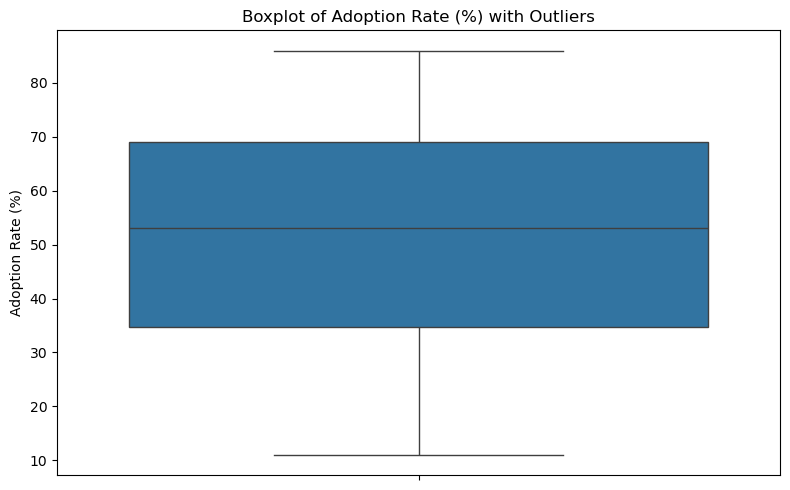

Outliers capped successfully.


In [135]:
# Calculate IQR
Q1 = df['Adoption Rate (%)'].quantile(0.25)
Q3 = df['Adoption Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Find outliers
outliers = df[(df['Adoption Rate (%)'] < lower_bound) | (df['Adoption Rate (%)'] > upper_bound)]
print(f"Number of Outliers Detected: {outliers.shape[0]}")

# Visualize with Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(y='Adoption Rate (%)', data=df)
plt.title('Boxplot of Adoption Rate (%) with Outliers')
plt.grid(visible=False)
plt.tight_layout()
plt.show()

# Option: Cap (Winsorize) the outliers
df['Adoption Rate (%)'] = np.where(df['Adoption Rate (%)'] > upper_bound, upper_bound,
                                             np.where(df['Adoption Rate (%)'] < lower_bound, lower_bound,
                                                      df['Adoption Rate (%)']))
print("Outliers capped successfully.")


In [136]:
# Create new Feature
def categorize_adoption(rate):
    if rate >= 70:
        return 'High'
    elif rate >= 40:
        return 'Medium'
    else:
        return 'Low'

df['Adoption Category'] = df['Adoption Rate (%)'].apply(categorize_adoption)

# Preview
print(df[['Adoption Rate (%)', 'Adoption Category']].head())


   Adoption Rate (%) Adoption Category
0               41.0            Medium
1               85.0              High
2               37.0               Low
3               38.0               Low
4               65.0            Medium


C:\Users\kotte\OneDrive - presidencyuniversity.in\Anaconda files\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


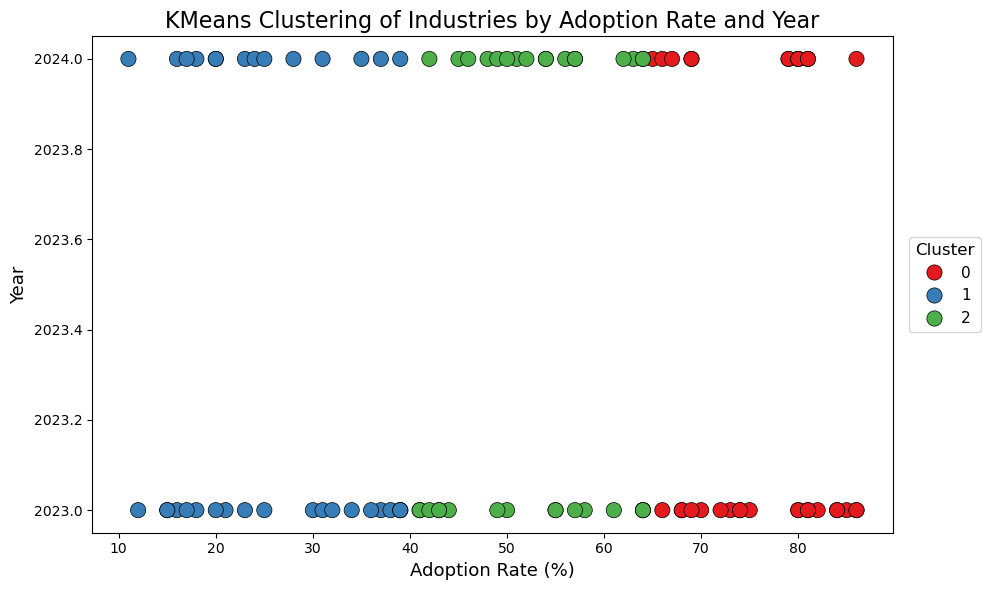

     Industry  Year  Adoption Rate (%)  Cluster
0   Education  2023               41.0        2
1     Finance  2023               85.0        0
2     Finance  2023               37.0        1
3       Legal  2023               38.0        1
4  Technology  2024               65.0        0


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Prepare clustering data
X_cluster = df[['Adoption Rate (%)', 'Year']]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Adoption Rate (%)',
    y='Year',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=120,
    edgecolor='black',
    linewidth=0.5
)

# Title and axis labels
plt.title('KMeans Clustering of Industries by Adoption Rate and Year', fontsize=16)
plt.xlabel('Adoption Rate (%)', fontsize=13)
plt.ylabel('Year', fontsize=13)

# Remove gridlines
plt.grid(visible=False)

# Move legend to the right outside
plt.legend(
    title='Cluster',
    fontsize=11,
    title_fontsize=12,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

# Tight layout
plt.tight_layout()
plt.show()

# Display cluster assignments
print(df[['Industry', 'Year', 'Adoption Rate (%)', 'Cluster']].head())



In [142]:
print(industry_year.columns)


Index([2023, 2024, 'Growth', 'Predicted_2025'], dtype='object', name='Year')


In [143]:
print(industry_year[[2023, 2024, 'Growth', 'Predicted_2025']].sort_values(by='Predicted_2025', ascending=False))


Year                2023       2024     Growth  Predicted_2025
Industry                                                      
Manufacturing  45.333333  68.500000  23.166667       91.666667
Technology     45.000000  57.000000  12.000000       69.000000
Legal          62.285714  63.333333   1.047619       64.380952
Retail         53.800000  53.000000  -0.800000       52.200000
Marketing      63.000000  52.071429 -10.928571       41.142857
Healthcare     39.833333  39.400000  -0.433333       38.966667
Finance        60.000000  47.428571 -12.571429       34.857143
Education      57.400000  32.750000 -24.650000        8.100000


C:\Users\kotte\AppData\Local\Temp\ipykernel_7500\1916107897.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


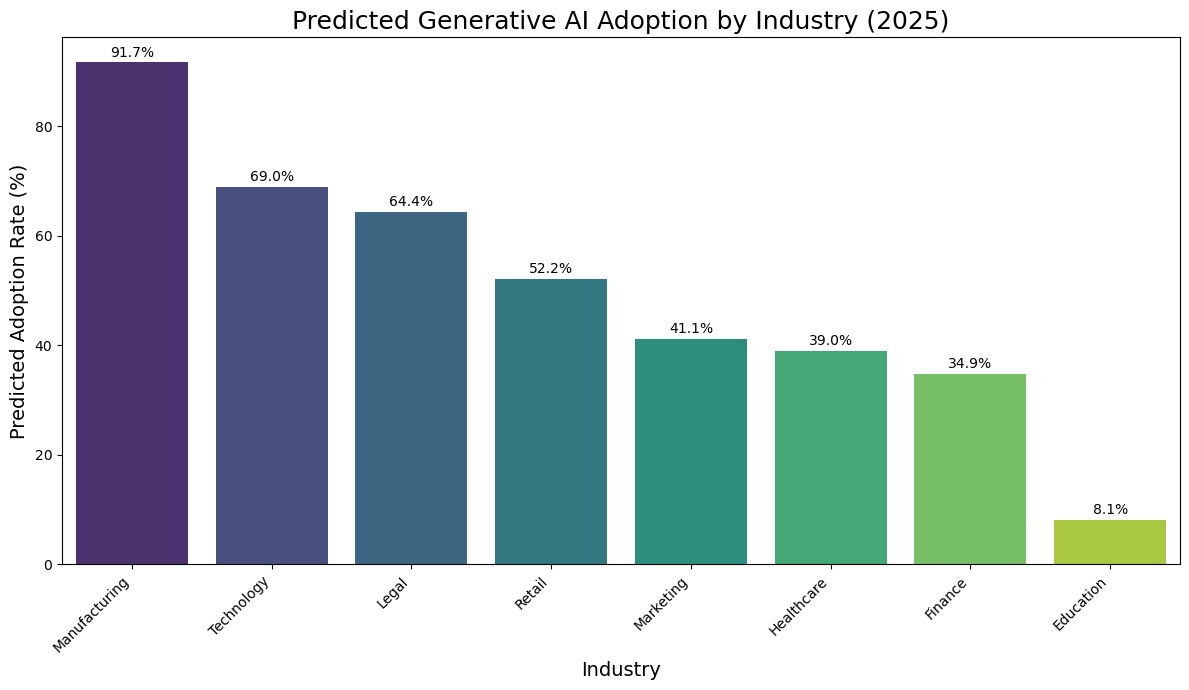

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sort industries by predicted adoption for 2025
industry_sorted = industry_year.sort_values(by='Predicted_2025', ascending=False)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    x=industry_sorted.index, 
    y=industry_sorted['Predicted_2025'], 
    palette='viridis'
)

# Title and labels
plt.title('Predicted Generative AI Adoption by Industry (2025)', fontsize=18)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Predicted Adoption Rate (%)', fontsize=14)

# Remove gridlines
plt.grid(visible=False)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with values
for index, value in enumerate(industry_sorted['Predicted_2025']):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Tight layout
plt.tight_layout()
plt.show()
